In [1]:
# Example of file for charm stocastics
import uproot
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Delta_Phi(phi1, phi2):
    pi = 3.14159265358979323846
    dphi = abs(phi1 - phi2)
    return np.where(dphi > pi, 2*pi - dphi, dphi)
def Delta_R(phi1, eta1, phi2, eta2):
    dphi = Delta_Phi(phi1,phi2)
    deta = abs( eta1 - eta2 )
    return pow( dphi*dphi + deta*deta, 0.5 )

In [3]:
# Here below we are just reading the csv file
dfcharm = pd.read_csv("input/Ds_EventData_ptmin4.csv")

#with the command below you can inspect the columns of the dataframe
dfcharm.columns

Index(['cLO_pT', 'cLO_phi', 'cLO_eta', 'c_pT', 'c_phi', 'c_eta', 'chad_pT',
       'chad_phi', 'chad_eta', 'cbarLO_pT', 'cbarLO_phi', 'cbarLO_eta',
       'cbar_pT', 'cbar_phi', 'cbar_eta', 'cbarhad_pT', 'cbarhad_phi',
       'cbarhad_eta', 'd1_pT', 'd1_phi', 'd1_eta', 'd1bar_pT', 'd1bar_phi',
       'd1bar_eta', 'd2_pT', 'd2_phi', 'd2_eta', 'd2bar_pT', 'd2bar_phi',
       'd2bar_eta', 'd3_pT', 'd3_phi', 'd3_eta', 'd3bar_pT', 'd3bar_phi',
       'd3bar_eta', 'd4_pT', 'd4_phi', 'd4_eta', 'd4bar_pT', 'd4bar_phi',
       'd4bar_eta', 'multiplicity', 'chad_cone_mult', 'chad_ptcone',
       'cbarhad_cone_mult', 'cbarhad_ptcone'],
      dtype='object')

In [4]:
#Build new columns in the dataframe
#momentum ratios of c to cbar at LO, Before and After Hadronisation
#For Ds_EventData.csv: chad = Ds; d1 = pi+; d2 = phi; d3 = K+ (Ds); d4 = K+ (Dsbar) 
#For Lc_EventData.csv: chad = Lambda_c; d1 = p+; d2 = K0; d3 = pi+ (Lc); d4 = pi+ (Lcbar) 
dfcharm["chad_ptratio"] = dfcharm["chad_pT"]/dfcharm["cbarhad_pT"]
dfcharm["c_ptratio"] = dfcharm["c_pT"]/dfcharm["cbar_pT"]
dfcharm["cLO_ptratio"] = dfcharm["cLO_pT"]/dfcharm["cbarLO_pT"]
#fragmentation functions for c and cbar
dfcharm["FFc"] = dfcharm["chad_pT"]/dfcharm["chad_ptcone"]
dfcharm["FFcbar"] = dfcharm["cbarhad_pT"]/dfcharm["cbarhad_ptcone"]
#pseudorapidity separation of ccbar pair at LO, Before and After Hadronisation
dfcharm["deta_hadrons"] = abs( dfcharm["chad_eta"] - dfcharm["cbarhad_eta"] )
dfcharm["deta_cc"] = abs( dfcharm["c_eta"] - dfcharm["cbar_eta"] )
dfcharm["deta_ccLO"] = abs( dfcharm["cLO_eta"] - dfcharm["cbarLO_eta"] )
#pseudorapidity separation of c-quark and respective charmed hadron
dfcharm["deta_chad"] = abs( dfcharm["c_eta"] - dfcharm["chad_eta"] )
dfcharm["deta_cbarhad"] = abs( dfcharm["cbar_eta"] - dfcharm["cbarhad_eta"] )
#angular separation of ccbar pair at LO, Before and After Hadronisation
dfcharm["dphi_hadrons"] = Delta_Phi(dfcharm["chad_phi"], dfcharm["cbarhad_phi"]) 
dfcharm["dphi_cc"] = Delta_Phi(dfcharm["c_phi"], dfcharm["cbar_phi"])
dfcharm["dphi_ccLO"] = Delta_Phi(dfcharm["cLO_phi"], dfcharm["cbarLO_phi"])
#angular separation of c-quark and respective charmed hadron
dfcharm["dphi_chad"] = Delta_Phi(dfcharm["c_phi"], dfcharm["chad_phi"])
dfcharm["dphi_cbarhad"] = Delta_Phi(dfcharm["cbar_phi"], dfcharm["cbarhad_phi"])
#angular distance of daughter particles to their charmed hadronic mother
dfcharm["dR_d1"] = Delta_R(dfcharm["chad_phi"],dfcharm["chad_eta"],dfcharm["d1_phi"],dfcharm["d1_eta"])
dfcharm["dR_d1bar"] = Delta_R(dfcharm["cbarhad_phi"],dfcharm["cbarhad_eta"],dfcharm["d1bar_phi"],dfcharm["d1bar_eta"])
dfcharm["dR_d3"] = Delta_R(dfcharm["chad_phi"],dfcharm["chad_eta"],dfcharm["d3_phi"],dfcharm["d3_eta"])
dfcharm["dR_d3bar"] = Delta_R(dfcharm["cbarhad_phi"],dfcharm["cbarhad_eta"],dfcharm["d3bar_phi"],dfcharm["d3bar_eta"])
dfcharm["dR_d4"] = Delta_R(dfcharm["chad_phi"],dfcharm["chad_eta"],dfcharm["d4_phi"],dfcharm["d4_eta"])
dfcharm["dR_d4bar"] = Delta_R(dfcharm["cbarhad_phi"],dfcharm["cbarhad_eta"],dfcharm["d4bar_phi"],dfcharm["d4bar_eta"])


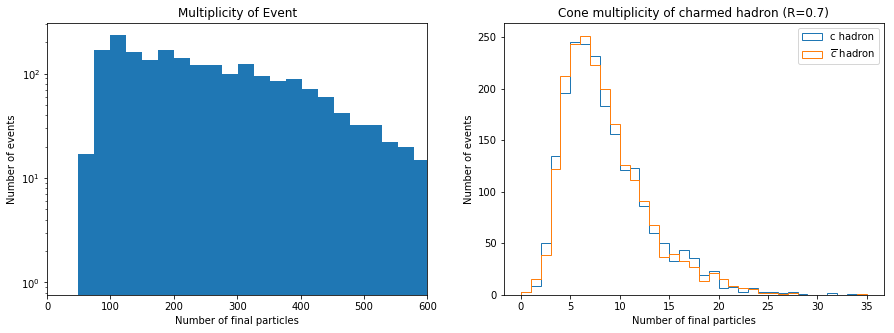

In [5]:
#multiplicity plots
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].set_yscale("log")
axes[0].set_title("Multiplicity of Event")
axes[0].set_xlabel("Number of final particles")
axes[0].set_ylabel("Number of events")
axes[0].hist(dfcharm["multiplicity"], bins=30)
axes[0].set_xlim([0,600])

axes[1].set_title("Cone multiplicity of charmed hadron (R=0.7)")
axes[1].set_xlabel("Number of final particles")
axes[1].set_ylabel("Number of events")
axes[1].hist(dfcharm["chad_cone_mult"],bins=35, range = [0,35], label = 'c hadron',histtype = "step", fill = False)
axes[1].hist(dfcharm["cbarhad_cone_mult"],bins=35, range = [0,35], label = '$\overline{c}$ hadron',histtype = "step", fill = False)
axes[1].legend()



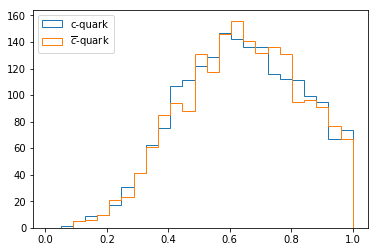

In [6]:
#Fragmentation functions for c and cbar
#plt.xscale("log")
plt.hist(dfcharm["FFc"], bins=25, range = [0.01,1], label = "c-quark", histtype = "step", fill = False)
plt.hist(dfcharm["FFcbar"], bins=25, range = [0.01,1], label = '$\overline{c}$-quark', histtype = "step", fill = False)
plt.legend(loc = 'upper left')

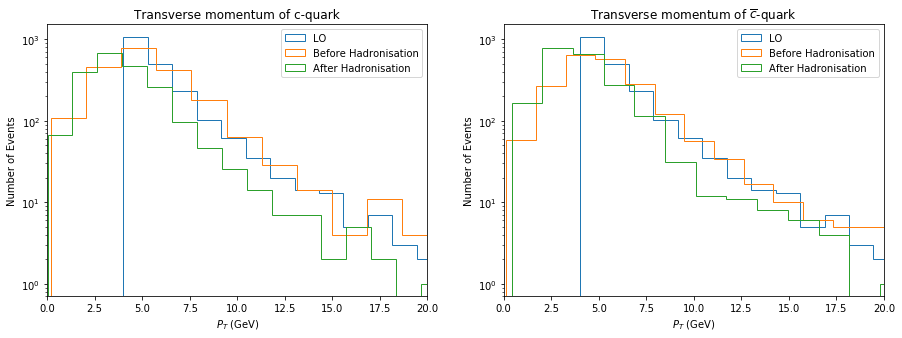

In [7]:
#pT of charm states
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].set_yscale("log")
axes[0].set_xlim([0,20])
axes[0].set_title("Transverse momentum of c-quark")
axes[0].set_xlabel(r'$P_T$ (GeV)')
axes[0].set_ylabel('Number of Events')
axes[0].hist(dfcharm["cLO_pT"], bins=20, label = "LO", histtype = "step", fill = False)
axes[0].hist(dfcharm["c_pT"], bins=20, label = "Before Hadronisation", histtype = "step", fill = False)
axes[0].hist(dfcharm["chad_pT"], bins=20, label = "After Hadronisation", histtype = "step", fill = False)
axes[0].legend()

#pT of cbar states
axes[1].set_yscale("log")
axes[1].set_xlim([0,20])
axes[1].set_title(r'Transverse momentum of $\overline{c}$-quark')
axes[1].set_xlabel(r'$P_T$ (GeV)')
axes[1].set_ylabel('Number of Events')
axes[1].hist(dfcharm["cbarLO_pT"], bins=20, label = "LO", histtype = "step", fill = False)
axes[1].hist(dfcharm["cbar_pT"], bins=20, label = "Before Hadronisation", histtype = "step", fill = False)
axes[1].hist(dfcharm["cbarhad_pT"], bins=20, label = "After Hadronisation", histtype = "step", fill = False)
axes[1].legend()

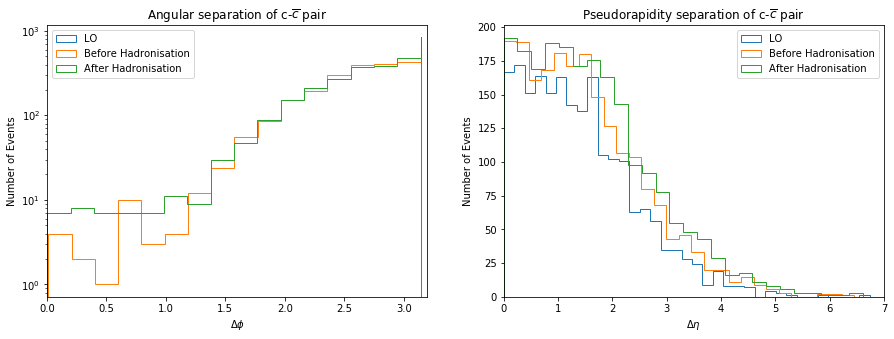

In [8]:
#angular separation of ccbar pair
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].set_yscale("log")
axes[0].set_xlim([0,3.2])
axes[0].set_title(r'Angular separation of c-$\overline{c}$ pair')
axes[0].set_xlabel(r'$\Delta\phi$')
axes[0].set_ylabel('Number of Events')
axes[0].hist(dfcharm["dphi_ccLO"], bins=16, label = "LO", histtype = "step", fill = False)
axes[0].hist(dfcharm["dphi_cc"], bins=16, label = "Before Hadronisation", histtype = "step", fill = False)
axes[0].hist(dfcharm["dphi_hadrons"], bins=16, label = "After Hadronisation", histtype = "step", fill = False)
axes[0].legend()

axes[1].set_xlim([0,7])
axes[1].set_title(r'Pseudorapidity separation of c-$\overline{c}$ pair')
axes[1].set_xlabel(r'$\Delta\eta$')
axes[1].set_ylabel('Number of Events')
axes[1].hist(dfcharm["deta_ccLO"], bins=35, label = "LO", histtype = "step", fill = False)
axes[1].hist(dfcharm["deta_cc"], bins=35, label = "Before Hadronisation", histtype = "step", fill = False)
axes[1].hist(dfcharm["deta_hadrons"], bins=35, label = "After Hadronisation", histtype = "step", fill = False)
axes[1].legend()

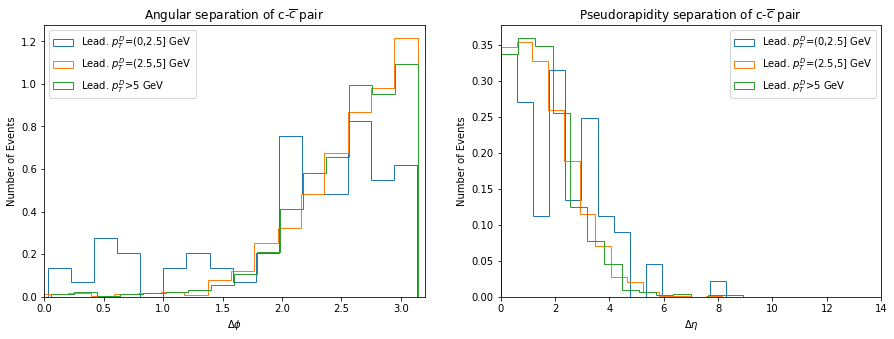

In [9]:
#plot delta phi and delta eta in bins of pt
#Organise in bins of leading D meson pT. Try (0-2.5],(2.5,5],(>5) GeV
dfcharm["LeadingHad_pT"] = dfcharm[["chad_pT","cbarhad_pT"]].max(axis=1)
dfcharm["pT0to2.5"] = np.where( dfcharm["LeadingHad_pT"] <= 2.5, True, False)
dfcharm["pT2.5to5"] = np.logical_and( np.greater(dfcharm["LeadingHad_pT"], 2.5), np.less_equal(dfcharm["LeadingHad_pT"], 5))
dfcharm["pT5plus"] = np.where( dfcharm["LeadingHad_pT"] > 5, True, False)

dphi_bin1 = []
dphi_bin2 = []
dphi_bin3 = []
deta_bin1 = []
deta_bin2 = []
deta_bin3 = []
#loop over column and create lists of data that passes bin selection
for i in range(len(dfcharm["dphi_hadrons"])):
    if dfcharm.loc[i,"pT0to2.5"] : 
        dphi_bin1.append(dfcharm.loc[i,"dphi_hadrons"])
        deta_bin1.append(dfcharm.loc[i,"deta_hadrons"])
    elif dfcharm.loc[i,"pT2.5to5"] : 
        dphi_bin2.append(dfcharm.loc[i,"dphi_hadrons"])
        deta_bin2.append(dfcharm.loc[i,"deta_hadrons"])
    elif dfcharm.loc[i,"pT5plus"] : 
        dphi_bin3.append(dfcharm.loc[i,"dphi_hadrons"])
        deta_bin3.append(dfcharm.loc[i,"deta_hadrons"])

#plot histograms
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].set_xlim([0,3.2])
axes[0].set_title(r'Angular separation of c-$\overline{c}$ pair')
axes[0].set_xlabel(r'$\Delta\phi$')
axes[0].set_ylabel('Number of Events')
axes[0].hist(dphi_bin1, bins=16, label='Lead. $p_{T}^{D}$=(0,2.5] GeV', histtype="step", fill = False, density = True)
axes[0].hist(dphi_bin2, bins=16, label='Lead. $p_{T}^{D}$=(2.5,5] GeV', histtype="step", fill = False, density = True)
axes[0].hist(dphi_bin3, bins=16, label='Lead. $p_{T}^{D}$>5 GeV', histtype="step", fill = False, density = True)
axes[0].legend(loc="upper left")

axes[1].set_xlim([0,14])
axes[1].set_title(r'Pseudorapidity separation of c-$\overline{c}$ pair')
axes[1].set_xlabel(r'$\Delta\eta$')
axes[1].set_ylabel('Number of Events')
axes[1].hist(deta_bin1, bins=14, label='Lead. $p_{T}^{D}$=(0,2.5] GeV', histtype="step", fill = False, density = True)
axes[1].hist(deta_bin2, bins=14, label='Lead. $p_{T}^{D}$=(2.5,5] GeV', histtype="step", fill = False, density = True)
axes[1].hist(deta_bin3, bins=14, label='Lead. $p_{T}^{D}$>5 GeV', histtype="step", fill = False, density = True)
axes[1].legend()

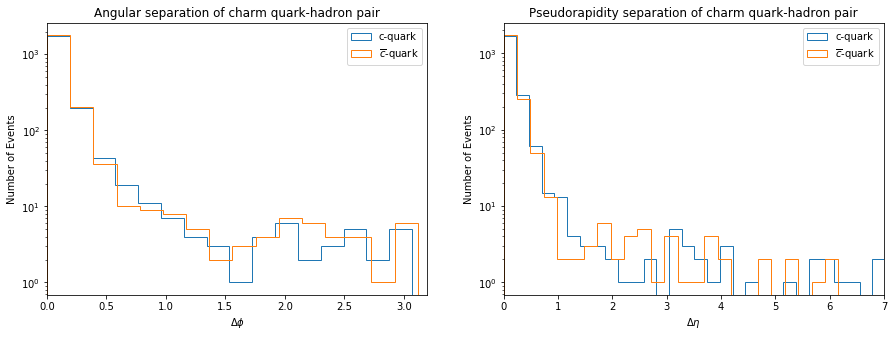

In [10]:
#Angular and pseudorapidity of c-D pairs
fig, axes = plt.subplots(1,2, figsize=(15,5))

#angular separation of c-D
axes[0].set_yscale("log")
axes[0].set_xlim([0,3.2])
axes[0].set_title(r'Angular separation of charm quark-hadron pair')
axes[0].set_xlabel(r'$\Delta\phi$')
axes[0].set_ylabel('Number of Events')
axes[0].hist(dfcharm["dphi_chad"], bins=16, label = "c-quark", histtype = "step", fill = False)
axes[0].hist(dfcharm["dphi_cbarhad"], bins=16, label = '$\overline{c}$-quark', histtype = "step", fill = False)
axes[0].legend()

#pseudorapidity separation of c-D
axes[1].set_yscale("log")
axes[1].set_xlim([0,7])
axes[1].set_title(r'Pseudorapidity separation of charm quark-hadron pair')
axes[1].set_xlabel(r'$\Delta\eta$')
axes[1].set_ylabel('Number of Events')
axes[1].hist(dfcharm["deta_chad"], bins=35, label = "c-quark", histtype = "step", fill = False)
axes[1].hist(dfcharm["deta_cbarhad"], bins=35, label = '$\overline{c}$-quark', histtype = "step", fill = False)
axes[1].legend()

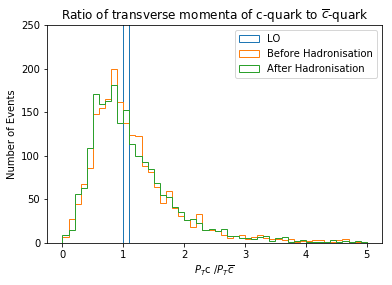

In [11]:
#pt ratio c to cbar

plt.title(r'Ratio of transverse momenta of c-quark to $\overline{c}$-quark')
plt.xlabel(r'$P_T$c /$P_T\overline{c}$')
plt.ylabel('Number of Events')
plt.ylim([0,250])
plt.hist(dfcharm["cLO_ptratio"], bins=50, range = [0,5], label = "LO", histtype = "step", fill = False)
plt.hist(dfcharm["c_ptratio"], bins=50, range = [0,5], label = "Before Hadronisation", histtype = "step", fill = False)
plt.hist(dfcharm["chad_ptratio"], bins=50, range = [0,5], label = "After Hadronisation", histtype = "step", fill = False)
plt.legend()

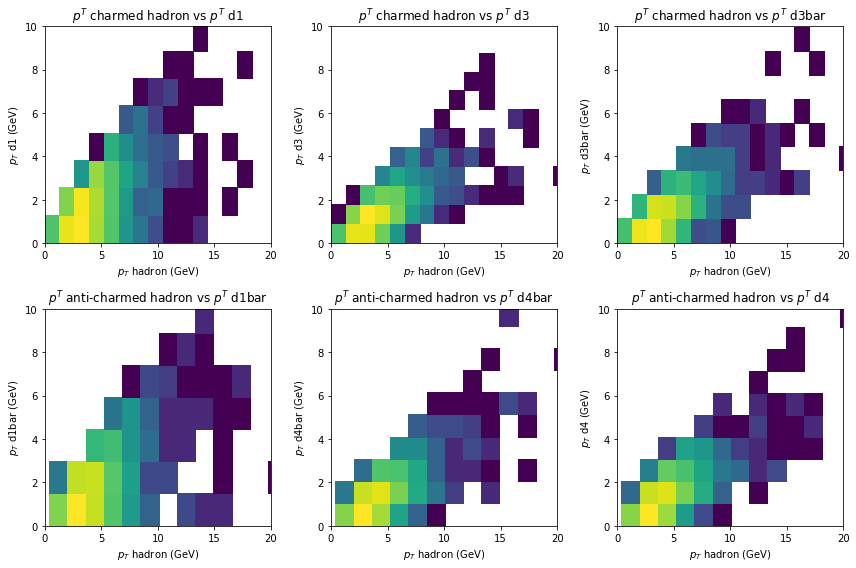

In [12]:
#pt of D-meson vs daughter particle pts
fig, axes = plt.subplots(2,3, figsize=(12,8))

axes[0,0].set_title('$p^T$ charmed hadron vs $p^T$ d1')
axes[0,0].set_xlabel(r'$p_T$ hadron (GeV)')
axes[0,0].set_ylabel(r'$p_T$ d1 (GeV)')
axes[0,0].hist2d(dfcharm["chad_pT"],dfcharm["d1_pT"], bins=[20,10], norm=mpl.colors.LogNorm())
axes[0,0].set_xlim([0,20])
axes[0,0].set_ylim([0,10])

axes[0,1].set_title('$p^T$ charmed hadron vs $p^T$ d3')
axes[0,1].set_xlabel(r'$p_T$ hadron (GeV)')
axes[0,1].set_ylabel(r'$p_T$ d3 (GeV)')
axes[0,1].hist2d(dfcharm["chad_pT"],dfcharm["d3_pT"], bins=[20,10], norm=mpl.colors.LogNorm())
axes[0,1].set_xlim([0,20])
axes[0,1].set_ylim([0,10])

axes[0,2].set_title('$p^T$ charmed hadron vs $p^T$ d3bar')
axes[0,2].set_xlabel(r'$p_T$ hadron (GeV)')
axes[0,2].set_ylabel(r'$p_T$ d3bar (GeV)')
axes[0,2].hist2d(dfcharm["chad_pT"],dfcharm["d3bar_pT"], bins=[20,10], norm=mpl.colors.LogNorm())
axes[0,2].set_xlim([0,20])
axes[0,2].set_ylim([0,10])

axes[1,0].set_title('$p^T$ anti-charmed hadron vs $p^T$ d1bar')
axes[1,0].set_xlabel(r'$p_T$ hadron (GeV)')
axes[1,0].set_ylabel(r'$p_T$ d1bar (GeV)')
axes[1,0].hist2d(dfcharm["cbarhad_pT"],dfcharm["d1bar_pT"], bins=[20,10], norm=mpl.colors.LogNorm())
axes[1,0].set_xlim([0,20])
axes[1,0].set_ylim([0,10])

axes[1,1].set_title('$p^T$ anti-charmed hadron vs $p^T$ d4bar')
axes[1,1].set_xlabel(r'$p_T$ hadron (GeV)')
axes[1,1].set_ylabel(r'$p_T$ d4bar (GeV)')
axes[1,1].hist2d(dfcharm["cbarhad_pT"],dfcharm["d4bar_pT"], bins=[20,10], norm=mpl.colors.LogNorm())
axes[1,1].set_xlim([0,20])
axes[1,1].set_ylim([0,10])

axes[1,2].set_title('$p^T$ anti-charmed hadron vs $p^T$ d4')
axes[1,2].set_xlabel(r'$p_T$ hadron (GeV)')
axes[1,2].set_ylabel(r'$p_T$ d4 (GeV)')
axes[1,2].hist2d(dfcharm["cbarhad_pT"],dfcharm["d4_pT"], bins=[20,10], norm=mpl.colors.LogNorm())
axes[1,2].set_xlim([0,20])
axes[1,2].set_ylim([0,10])
plt.tight_layout()


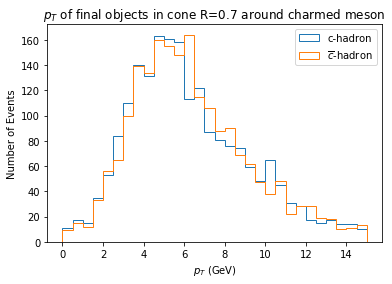

In [13]:
#ptcone plots
plt.hist(dfcharm["chad_ptcone"], bins=30, range = [0,15], label = 'c-hadron', histtype = "step", fill = False)
plt.hist(dfcharm["cbarhad_ptcone"], bins=30, range = [0,15], label = '$\overline{c}$-hadron', histtype = "step", fill = False)
plt.title("$p_T$ of final objects in cone R=0.7 around charmed meson")
plt.xlabel("$p_T$ (GeV)")
plt.ylabel("Number of Events")
plt.legend()

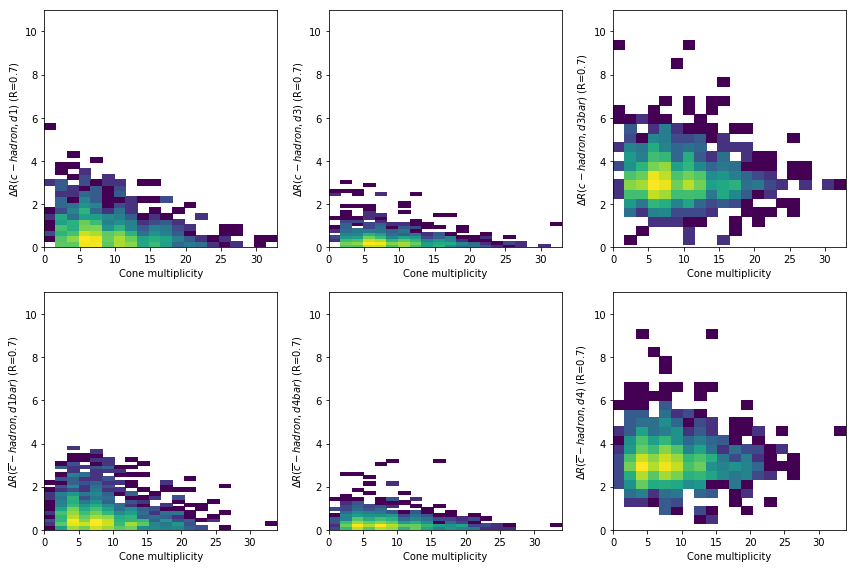

In [14]:
#2D histograms of angular distance from D meson to daughters as function of cone multiplicity
fig, axes = plt.subplots(2,3, figsize=(12,8))

axes[0,0].hist2d(dfcharm["chad_cone_mult"], dfcharm["dR_d1"], bins = [20,22], norm=mpl.colors.LogNorm())
axes[0,0].set_xlabel('Cone multiplicity')
axes[0,0].set_ylabel('$\Delta R(c-hadron,d1)$ (R=0.7)')
axes[0,0].set_ylim([0,11])

axes[0,1].hist2d(dfcharm["chad_cone_mult"], dfcharm["dR_d3"], bins = [20,22], norm=mpl.colors.LogNorm())
axes[0,1].set_xlabel('Cone multiplicity')
axes[0,1].set_ylabel('$\Delta R(c-hadron,d3)$ (R=0.7)')
axes[0,1].set_ylim([0,11])

axes[0,2].hist2d(dfcharm["chad_cone_mult"], dfcharm["dR_d3bar"], bins = [20,22], norm=mpl.colors.LogNorm())
axes[0,2].set_xlabel('Cone multiplicity')
axes[0,2].set_ylabel('$\Delta R(c-hadron,d3bar)$ (R=0.7)')
axes[0,2].set_ylim([0,11])

axes[1,0].hist2d(dfcharm["cbarhad_cone_mult"], dfcharm["dR_d1bar"], bins = [20,22], norm=mpl.colors.LogNorm())
axes[1,0].set_xlabel('Cone multiplicity')
axes[1,0].set_ylabel('$\Delta R(\overline{c}-hadron,d1bar)$ (R=0.7)')
axes[1,0].set_ylim([0,11])

axes[1,1].hist2d(dfcharm["cbarhad_cone_mult"], dfcharm["dR_d4bar"], bins = [20,22], norm=mpl.colors.LogNorm())
axes[1,1].set_xlabel('Cone multiplicity')
axes[1,1].set_ylabel('$\Delta R(\overline{c}-hadron,d4bar)$ (R=0.7)')
axes[1,1].set_ylim([0,11])

axes[1,2].hist2d(dfcharm["cbarhad_cone_mult"], dfcharm["dR_d4"], bins = [20,22], norm=mpl.colors.LogNorm())
axes[1,2].set_xlabel('Cone multiplicity')
axes[1,2].set_ylabel('$\Delta R(\overline{c}-hadron,d4)$ (R=0.7)')
axes[1,2].set_ylim([0,11])

plt.tight_layout()




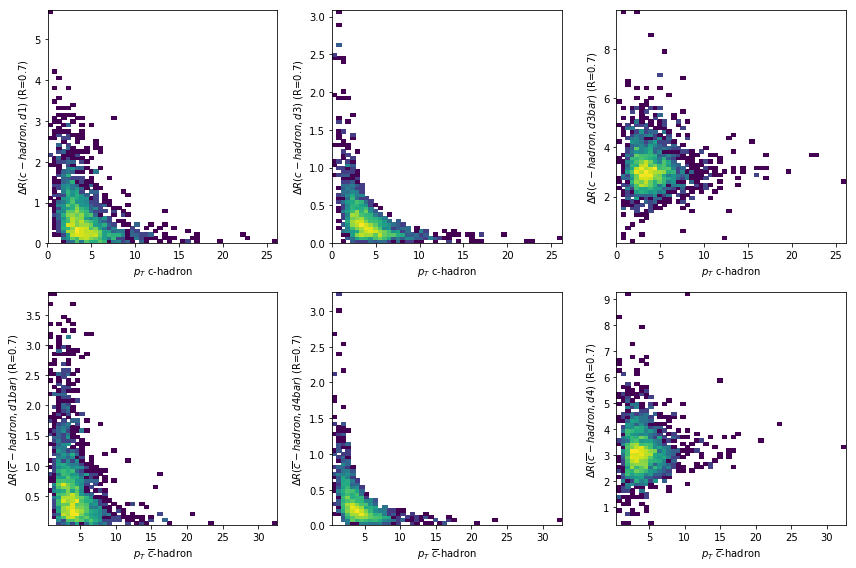

In [15]:
#2D histograms of angular distance from D meson to daughters as function of transverse momentum of D
fig, axes = plt.subplots(2,3,figsize=(12,8))

axes[0,0].hist2d(dfcharm["chad_pT"], dfcharm["dR_d1"], bins = [50,70], norm=mpl.colors.LogNorm())
axes[0,0].set_xlabel('$p_T$ c-hadron')
axes[0,0].set_ylabel('$\Delta R(c-hadron,d1)$ (R=0.7)')

axes[0,1].hist2d(dfcharm["chad_pT"], dfcharm["dR_d3"], bins = [50,70], norm=mpl.colors.LogNorm())
axes[0,1].set_xlabel('$p_T$ c-hadron')
axes[0,1].set_ylabel('$\Delta R(c-hadron,d3)$ (R=0.7)')

axes[0,2].hist2d(dfcharm["chad_pT"], dfcharm["dR_d3bar"], bins = [50,70], norm=mpl.colors.LogNorm())
axes[0,2].set_xlabel('$p_T$ c-hadron')
axes[0,2].set_ylabel('$\Delta R(c-hadron,d3bar)$ (R=0.7)')

axes[1,0].hist2d(dfcharm["cbarhad_pT"], dfcharm["dR_d1bar"], bins = [50,70], norm=mpl.colors.LogNorm())
axes[1,0].set_xlabel('$p_T$ $\overline{c}$-hadron')
axes[1,0].set_ylabel('$\Delta R(\overline{c}-hadron,d1bar)$ (R=0.7)')

axes[1,1].hist2d(dfcharm["cbarhad_pT"], dfcharm["dR_d4bar"], bins = [50,70], norm=mpl.colors.LogNorm())
axes[1,1].set_xlabel('$p_T$ $\overline{c}$-hadron')
axes[1,1].set_ylabel('$\Delta R(\overline{c}-hadron,d4bar)$ (R=0.7)')

axes[1,2].hist2d(dfcharm["cbarhad_pT"], dfcharm["dR_d4"], bins = [50,70], norm=mpl.colors.LogNorm())
axes[1,2].set_xlabel('$p_T$ $\overline{c}$-hadron')
axes[1,2].set_ylabel('$\Delta R(\overline{c}-hadron,d4)$ (R=0.7)')

plt.tight_layout()
